`Topic:       Challenge Set 3
Subject:      Explore 2013 Movie Data
Date:         01/17/2018
Name:         Kevin Stern
Worked with:  Audrey Baker
`

### Pandas Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('2013_movies.csv')

In [18]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [20]:
df.columns.values

array(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'], dtype=object)

### Challenge 1

Plot domestic total gross over time.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [22]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format="%Y-%m-%d")

In [23]:
df = df.sort_values('ReleaseDate')

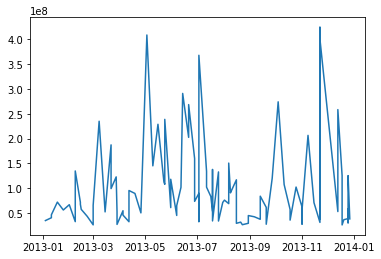

In [24]:
plt.plot(df.ReleaseDate, df.DomesticTotalGross);


### Challenge 2

Plot runtime vs. domestic total gross.


In [25]:
df = df.sort_values("Runtime")

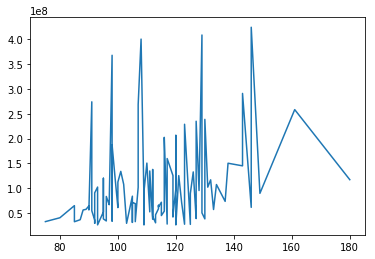

In [26]:
plt.plot(df.Runtime, df.DomesticTotalGross);

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


In [27]:
df.reset_index()
df_by_rating = df.groupby(['Rating'])[['Runtime', 'DomesticTotalGross']].mean()
df_by_rating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


In [28]:
df.Rating.value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

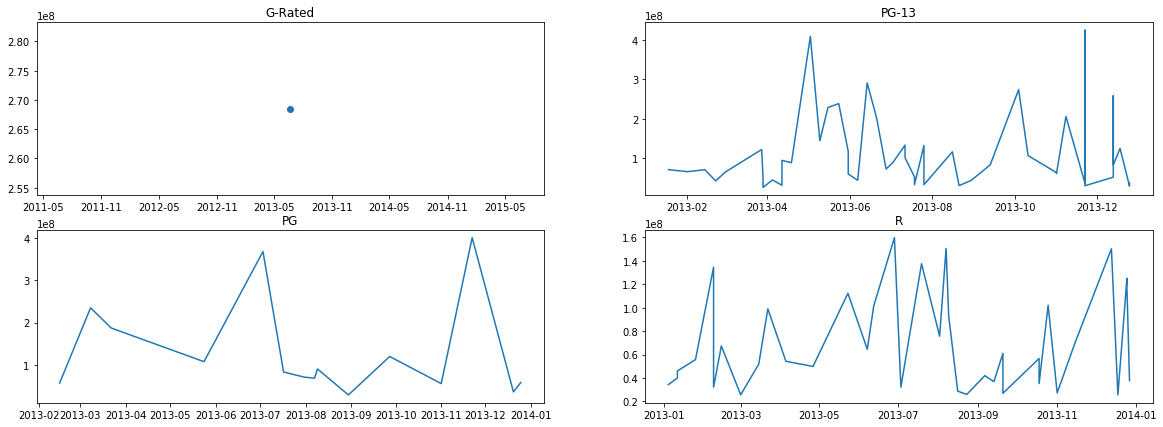

In [29]:
plt.subplots(nrows=2, ncols=2, figsize = (20,7))
df.sort_values('ReleaseDate', inplace = True)

plt.subplot(2, 2, 1)
plt.title('G-Rated')
plt.plot_date(df[df.Rating == 'G'].ReleaseDate, df[df.Rating == 'G'].DomesticTotalGross);

plt.subplot(2, 2, 2)
plt.title('PG-13')
plt.plot(df[df.Rating == 'PG-13'].ReleaseDate, df[df.Rating == 'PG-13'].DomesticTotalGross);

plt.subplot(2, 2, 3)
plt.title('PG')
plt.plot(df[df.Rating == 'PG'].ReleaseDate, df[df.Rating == 'PG'].DomesticTotalGross);

plt.subplot(2, 2, 4)
plt.title('R')
plt.plot(df[df.Rating == 'R'].ReleaseDate, df[df.Rating == 'R'].DomesticTotalGross);

plt.show()

### Challenge 5

What director in your dataset has the highest gross per movie?


In [30]:
df.columns.values

array(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'], dtype=object)

In [31]:
director = df.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False)
director.rename(columns={'DomesticTotalGross': 'Average Gross per Movie'})

Director
Francis Lawrence              424668047
Shane Black                   409013994
Chris BuckJennifer Lee        400738009
Pierre CoffinChris Renaud     368061265
Zack Snyder                   291045518
Alfonso Cuaron                274092705
Dan Scanlon                   268492764
Peter Jackson                 258366855
Justin Lin                    238679850
Sam Raimi                     234911825
J.J. Abrams                   228778661
Alan Taylor                   206362140
Marc Forster                  202359711
Kirk De MiccoChris Sanders    187168425
Paul Feig                     159582188
Rawson Marshall Thurber       150394119
David O. Russell              150117807
Baz Luhrmann                  144840419
Seth Gordon                   134506920
Dennis Dugan                  133668525
James Mangold                 132556852
Adam McKay                    125168368
Peter Berg                    125095601
Jon Chu                       122523060
Louis Leterrier               1

In [32]:
director.head(1)

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

Checking scenarios where there are two directors, is this an error in the data, or co-directors? Seems like it's just co-directors

In [33]:
df[df.Director == 'Chris BuckJennifer Lee']

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22


In [34]:
df[df.Director == 'Kirk De MiccoChris Sanders']

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
13,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22


### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [35]:
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
#df['ReleaseMonth'] = df['ReleaseDate'].dt.strftime('%b')


In [36]:
by_month = df.groupby('ReleaseMonth')['DomesticTotalGross'].mean()
by_month = pd.DataFrame(by_month)
by_month['SD'] = df.groupby('ReleaseMonth')['DomesticTotalGross'].std()
by_month['N'] = df.groupby('ReleaseMonth')['DomesticTotalGross'].count()
by_month['SE'] = by_month['SD']/np.sqrt(by_month['N'])
by_month.reset_index(inplace = True)
by_month

,ReleaseMonth,DomesticTotalGross,SD,N,SE
0,1,4.954324e+07,1.465947e+07,5,6.555914e+06
1,2,6.738601e+07,3.283185e+07,7,1.240927e+07
2,3,9.609710e+07,7.323942e+07,9,2.441314e+07
3,4,6.094072e+07,2.530104e+07,6,1.032911e+07
4,5,1.774097e+08,1.117754e+08,8,3.951859e+07
5,6,1.506500e+08,9.519994e+07,8,3.365826e+07
6,7,1.057807e+08,9.140837e+07,12,2.638732e+07
7,8,6.853126e+07,4.132232e+07,11,1.245915e+07
8,9,6.171231e+07,3.482327e+07,6,1.421654e+07
9,10,1.150270e+08,9.394330e+07,5,4.201272e+07


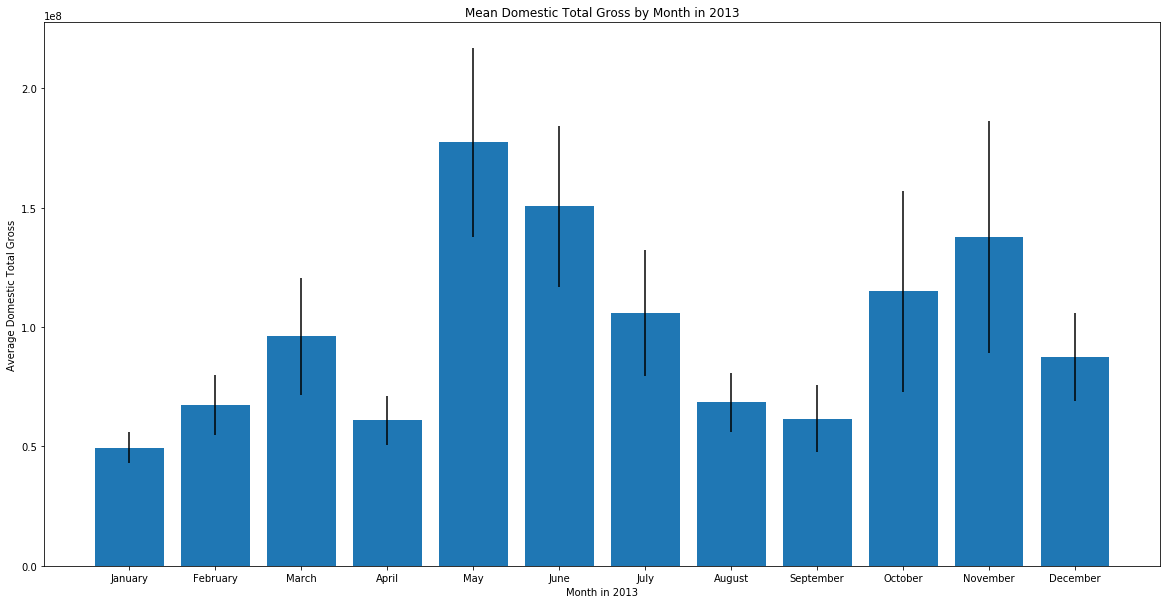

In [49]:
import calendar
plt.figure(figsize=(20,10))
plt.xlabel('Month in 2013')
plt.xticks(range(13), calendar.month_name[0:13])
plt.ylabel('Average Domestic Total Gross')
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.bar(by_month['ReleaseMonth'], by_month['DomesticTotalGross'], yerr = by_month.SE);